In [1]:
import cv2
import numpy as np
import os
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import glob
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split
from skimage import data, color, feature
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb
from skimage.feature import hog
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
image_folder = 'fake/'
images = []
labels = []
names = []
for filename in tqdm(sorted(os.listdir(image_folder))[:-1]):
    img = cv2.imread(os.path.join(image_folder, filename))
    if img is not None:
        images.append(img)
        labels.append('fake')
        names.append(filename)
    else:
        print(filename)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1710/1710 [00:19<00:00, 86.05it/s]


In [3]:
image_folder = 'real/'
for filename in tqdm(sorted(os.listdir(image_folder))[:-1]):
    img = cv2.imread(os.path.join(image_folder, filename))
    if img is not None:
        images.append(img)
        labels.append('real')
        names.append(filename)
    else:
        print(filename)

 56%|██████████████████████████████████████████████████████████████▋                                                 | 957/1710 [00:54<00:17, 43.99it/s]

810197636_real_none_sea_4.jpeg


 85%|█████████████████████████████████████████████████████████████████████████████████████████████▉                 | 1448/1710 [01:57<00:06, 42.61it/s]

810199515_real_none_jungle_1.jpeg
810199515_real_none_jungle_10.jpeg


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1710/1710 [02:37<00:00, 10.87it/s]


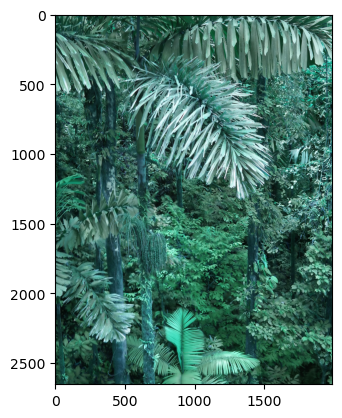

In [5]:
def preprocessing(data):
    arr_prep=[]
    for i in tqdm(range(len(data))):
        resized = cv2.resize(data[i], (64,64), interpolation = cv2.INTER_AREA)
        img=cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep 

dataPreprocessed = preprocessing(images)

In [6]:
def preprocessing2(data):
    arr_prep=[]
    for i in tqdm(range(len(data))):
        resized = cv2.resize(data[i], (128,128), interpolation = cv2.INTER_AREA)
        img=cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep 

In [5]:
images = None

In [8]:
# LBP Feature Extraction

def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))                   
    hist = hist.astype("float")                         
    hist /= (hist.sum() + (1e-7))
    return lbp,hist
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature
# dataExtracted_LBP, _ = featureExtraction(dataPreprocessed)

In [68]:
len(dataExtracted_LBP)

3417

In [10]:
sample_indexes = [random.randint(0, len(images)) for i in range(5)]
sample_images = [images[ind] for ind in sample_indexes]
sample_labels = [labels[ind] for ind in sample_indexes]
sample_indexes

[2855, 922, 2992, 990, 1293]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1011.60it/s]


Extraction Result


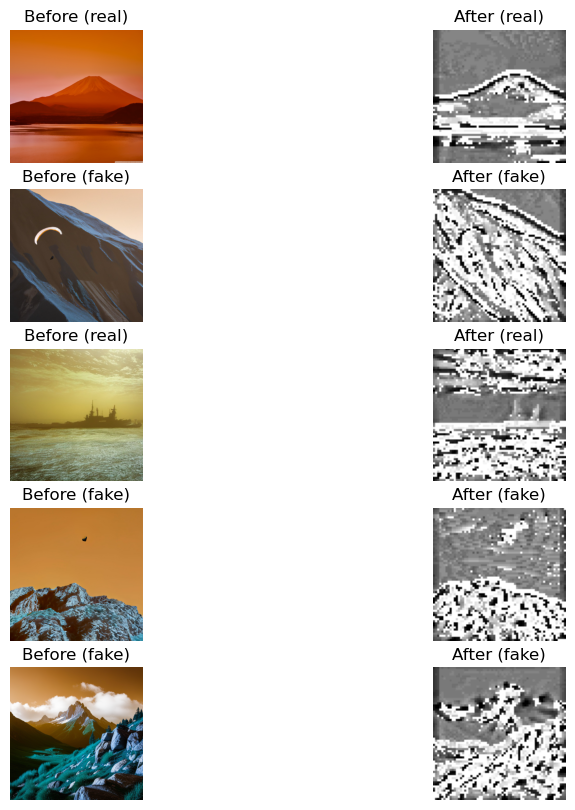

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 24.25it/s]


Extraction Result


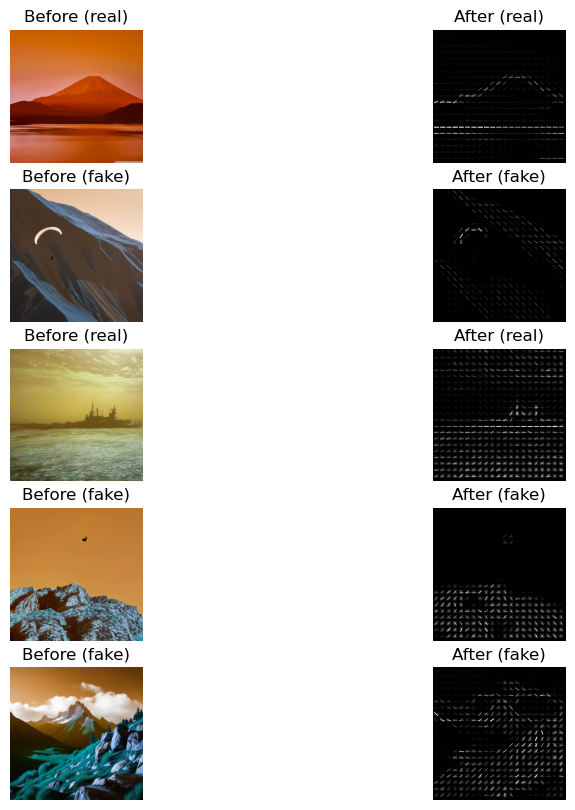

In [19]:
import random
sample_images = random.sample(images, 5)
S_dataPreprocessed = preprocessing(sample_images)
S_dataExtracted_LBP, _ = featureExtraction(S_dataPreprocessed)
fig = plt.figure(figsize=(10,10))
print('Extraction Result')
for i in range(len(sample_images)):
    ax1 = fig.add_subplot(5,2,2*i+1)
    ax1.set_title('Before ({})'.format(sample_labels[i]))
    ax1.set_axis_off()
    ax1.imshow(sample_images[i])
    ax2 = fig.add_subplot(5,2,2*i+2)
    ax2.set_title('After ({})'.format(sample_labels[i]))
    ax2.set_axis_off()
    ax2.imshow(S_dataExtracted_LBP[i],cmap=plt.cm.gray)
plt.show()
    
def extractHOG_show(img):
    _,ftr=hog(img, pixels_per_cell=(6, 6),cells_per_block=(1, 1), visualize=True, multichannel=False)
    return ftr

def featureExtraction_show(arr):
    arr_feature=[]
    for i in tqdm(range(len(arr))):
        arr_feature.append(extractHOG_show(arr[i]))
    return arr_feature


fig = plt.figure(figsize=(10,10))
S_dataPreprocessed = preprocessing2(sample_images)
S_dataExtracted_HOG = featureExtraction_show(S_dataPreprocessed)
print('Extraction Result')
for i in range(len(sample_images)):
    ax1 = fig.add_subplot(5,2,2*i+1)
    ax1.set_title('Before ({})'.format(sample_labels[i]))
    ax1.set_axis_off()
    ax1.imshow(sample_images[i])
    ax2 = fig.add_subplot(5,2,2*i+2)
    ax2.set_title('After ({})'.format(sample_labels[i]))
    ax2.set_axis_off()
    ax2.imshow(S_dataExtracted_HOG[i].reshape((128,128)),cmap=plt.cm.gray)

plt.show()

In [18]:
1

1

In [61]:
featur_LBP_df = pd.DataFrame(data = dataExtracted_LBP)

In [65]:
featur_LBP_df['labels'] = labels
featur_LBP_df['names'] = names

In [66]:
featur_LBP_df.to_csv('LBP_feature.csv',index=False)
featur_LBP_df = pd.read_csv('LBP_feature.csv')
featur_LBP_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,labels,names
0,1.0,8.0,7.0,1.0,25.0,25.0,25.0,25.0,8.0,3.0,...,8.0,10.0,25.0,25.0,25.0,0.0,0.0,0.0,fake,150400011_fake_dall.e_jungle_1.jpg
1,5.0,7.0,9.0,13.0,25.0,25.0,3.0,0.0,25.0,15.0,...,13.0,13.0,25.0,25.0,12.0,25.0,25.0,25.0,fake,150400011_fake_dall.e_jungle_2.jpg
2,3.0,6.0,6.0,6.0,0.0,25.0,25.0,25.0,25.0,2.0,...,0.0,2.0,25.0,15.0,25.0,2.0,2.0,5.0,fake,150400011_fake_dall.e_jungle_3.jpg
3,25.0,5.0,6.0,3.0,25.0,12.0,25.0,2.0,2.0,25.0,...,10.0,8.0,24.0,24.0,24.0,8.0,25.0,25.0,fake,150400011_fake_dall.e_jungle_4.jpg
4,1.0,7.0,7.0,1.0,25.0,12.0,25.0,25.0,2.0,2.0,...,13.0,14.0,25.0,6.0,4.0,25.0,7.0,7.0,fake,150400011_fake_dall.e_jungle_5.jpg


In [30]:
# HOG Feature Extraction

def extractHOG(img):
    ftr,_=hog(img, orientations=8, pixels_per_cell=(6, 6),
            cells_per_block=(1, 1), visualize=True, multichannel=False)
    return ftr

def featureExtraction(arr):
    arr_feature=[]
    for i in tqdm(range(len(arr))):
        arr_feature.append(extractHOG(arr[i]))
    return arr_feature

dataExtracted = featureExtraction(dataPreprocessed)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3417/3417 [00:28<00:00, 120.22it/s]


In [7]:
dataPreprocessed = None

In [31]:
len(dataExtracted)

3417

In [32]:
featur_df = pd.DataFrame(data=dataExtracted)

In [34]:
featur_df['labels'] = labels

In [35]:
featur_df['names'] = names

In [20]:
featur_df.to_csv('hog_feature.csv',index=False)

In [21]:
featur_df = pd.read_csv('hog_feature.csv')
featur_df.head()

,0,1,2,3,4,5,6,7,8,9,...,792,793,794,795,796,797,798,799,labels,names
0,0.389609,0.389609,0.202853,0.389609,0.389609,0.370699,0.389609,0.249916,0.389068,0.389068,...,0.413289,0.089428,0.413289,0.150869,0.380091,0.413289,0.413289,0.376220,fake,150400011_fake_dall.e_jungle_1.jpg
1,0.396726,0.396726,0.292393,0.356219,0.396726,0.312070,0.396726,0.246292,0.463806,0.463806,...,0.414781,0.209132,0.414781,0.414781,0.414781,0.309913,0.000000,0.414781,fake,150400011_fake_dall.e_jungle_2.jpg
2,0.418792,0.047710,0.268775,0.357347,0.418792,0.418792,0.418792,0.310225,0.386601,0.386601,...,0.382448,0.382448,0.090182,0.382448,0.382448,0.338034,0.382448,0.382448,fake,150400011_fake_dall.e_jungle_3.jpg
3,0.423086,0.261049,0.000000,0.191953,0.423086,0.423086,0.423086,0.423086,0.387195,0.387195,...,0.427290,0.427290,0.427290,0.271906,0.383158,0.127809,0.180597,0.427290,fake,150400011_fake_dall.e_jungle_4.jpg
4,0.442849,0.081291,0.113215,0.000000,0.442849,0.442849,0.442849,0.442849,0.493276,0.493276,...,0.418471,0.418471,0.418471,0.418471,0.290149,0.357932,0.115153,0.271968,fake,150400011_fake_dall.e_jungle_5.jpg


In [81]:
! zip features.zip features.csv

/bin/bash: /home/analysis/anaconda3/lib/python3.10/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
  adding: features.csv (deflated 55%)


In [82]:
! zip LBP_feature.zip LBP_feature.csv

/bin/bash: /home/analysis/anaconda3/lib/python3.10/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
  adding: LBP_feature.csv (deflated 87%)
